In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [81]:
import os
import glob
import datetime
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, LeakyReLU, BatchNormalization

In [64]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [65]:
def class_names(index):
    names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    if isinstance(index, int):
        return names[index]
    elif isinstance(index, (list, np.ndarray)) and len(index) > 0:
        return names[index[0]]
    else:
        return "Unknown"

In [66]:
# Display dataset information
print("Training set size:", len(train_images))
print("Test set size:", len(test_images))
print("Image shape:", train_images[0].shape)
print("Classes:", np.unique(train_labels))


Training set size: 50000
Test set size: 10000
Image shape: (32, 32, 3)
Classes: [0 1 2 3 4 5 6 7 8 9]


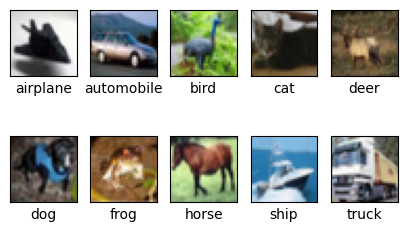

In [67]:
# Visualize some images from the training set
plt.figure(figsize=(5, 3))
for i, class_name in enumerate(np.unique(train_labels)):
    # Find the index of the first image corresponding to the class
    idx = next(idx for idx, label in enumerate(train_labels) if label == i)
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names(train_labels[idx]))
plt.show()


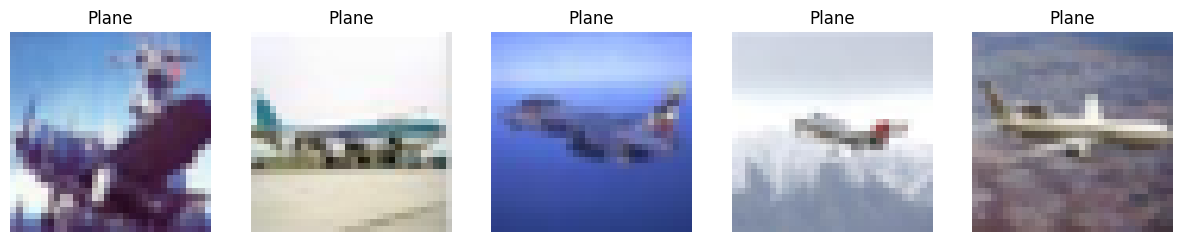

In [68]:
# Filter images and labels corresponding to the "plane" class
plane_indices = [i for i, label in enumerate(train_labels) if class_names(label) == 'airplane']
plane_images = train_images[plane_indices]

# Randomly select 5 images from the "plane" class
random_plane_images = plane_images[np.random.choice(len(plane_images), 5, replace=False)]

# Plot the images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random_plane_images[i])
    plt.title('Plane')
    plt.axis('off')
plt.show()

In [69]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [23]:
model3 = Sequential([
    Conv2D(32, 5, padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, 5, padding='same', activation=LeakyReLU(alpha=0.5)),
    MaxPooling2D(),
    Conv2D(64, 4, padding='same'),
    Conv2D(64, 4, padding='same', activation=LeakyReLU(alpha=0.5)),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same'),
    Conv2D(128, 3, padding='same', activation=LeakyReLU(alpha=0.5)),
    MaxPooling2D(),
    Conv2D(256, 2, padding='same'),
    Conv2D(256, 2, padding='same', activation=LeakyReLU(alpha=0.5)),
    MaxPooling2D(),
    Flatten(),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(256, activation='sigmoid'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])


model3.compile(optimizer = Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['sparse_categorical_accuracy'])


In [24]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [12]:
earlyStop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [18]:
# Train the model
history = model.fit(train_images, train_labels, epochs=200,validation_data=(test_images, test_labels),callbacks = [earlyStop])


Epoch 1/200


2024-04-23 22:04:01.616518: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_2_1/conv2d_33_1/leaky_re_lu_16_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_2_1/conv2d_33_1/add'.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 98ms/step - loss: 1.7523 - sparse_categorical_accuracy: 0.3515 - val_loss: 1.6116 - val_sparse_categorical_accuracy: 0.4642
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - loss: 1.1965 - sparse_categorical_accuracy: 0.5755 - val_loss: 1.1637 - val_sparse_categorical_accuracy: 0.5957
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - loss: 1.0010 - sparse_categorical_accuracy: 0.6458 - val_loss: 1.0241 - val_sparse_categorical_accuracy: 0.6459
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - loss: 0.9063 - sparse_categorical_accuracy: 0.6786 - val_loss: 0.8936 - val_sparse_categorical_accuracy: 0.6965
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - loss: 0.8096 - sparse_categorical_accuracy: 0.7156 - val_loss: 0.8543 - val_sparse_categorical_accuracy: 0.7034
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - loss: 0.7470 - sparse_categorical_accuracy: 0.7393 - val_loss: 0.9550 - val_sparse_categ

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.6353 - sparse_categorical_accuracy: 0.8003
Test accuracy: 0.7940000295639038


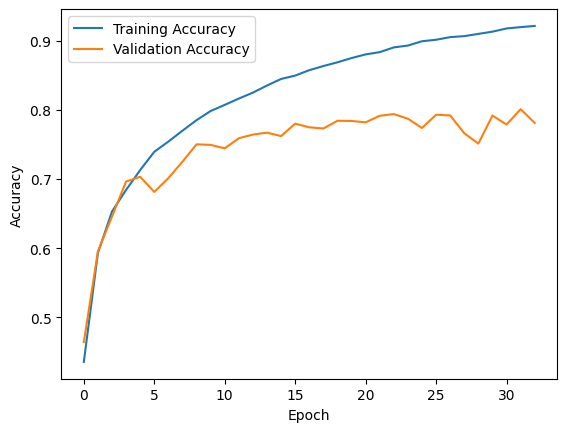

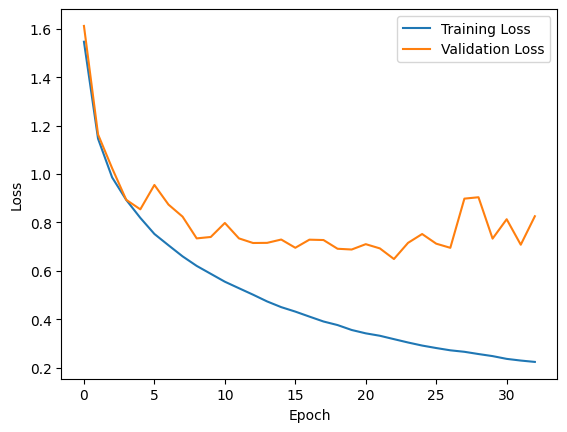

In [20]:
# Plot training/validation accuracy and loss curves
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Precision and Recall:
               precision    recall  f1-score   support

    airplane       0.78      0.86      0.82      1000
  automobile       0.89      0.88      0.89      1000
        bird       0.70      0.70      0.70      1000
         cat       0.64      0.62      0.63      1000
        deer       0.76      0.81      0.79      1000
         dog       0.71      0.71      0.71      1000
        frog       0.82      0.86      0.84      1000
       horse       0.89      0.77      0.83      1000
        ship       0.87      0.89      0.88      1000
       truck       0.90      0.83      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

Confusion Matrix:
 [[856   9  25  19  10  11   7   2  50  11]
 [ 17 882   4   6   3   5  10   1  25  47]
 [ 70   4 703  52  62  39  48  10   8   4]
 [ 14   6  72 623  59 141  5

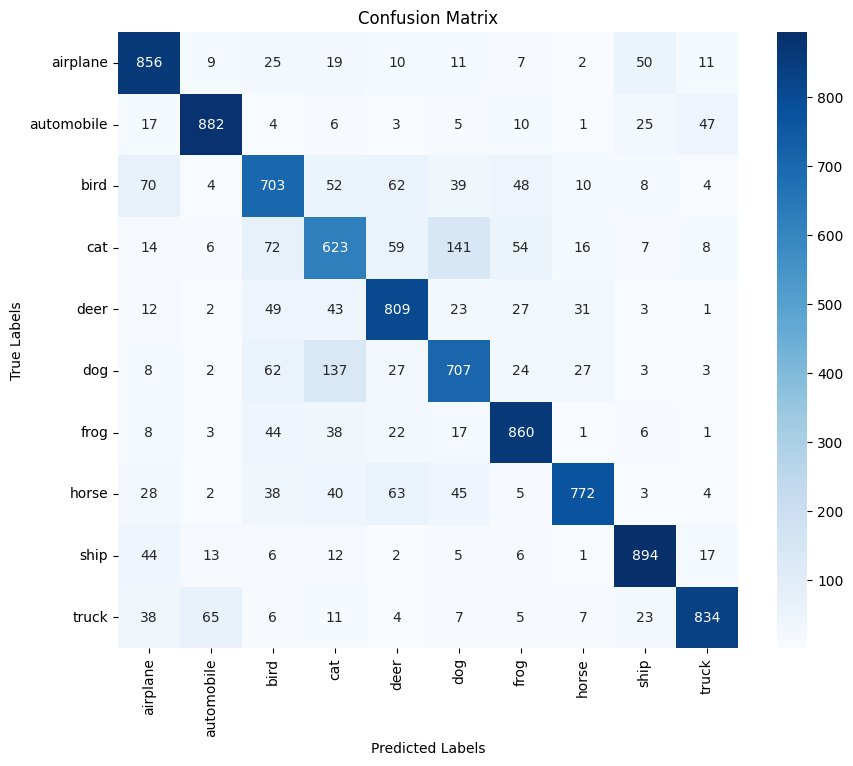

In [21]:
import seaborn as sns

# Calculate precision, recall, and confusion matrix
test_predictions = np.argmax(model.predict(test_images), axis=1)
precision_recall = classification_report(test_labels, test_predictions, target_names=[str(class_names(i)) for i in range(10)])
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Precision and Recall:\n", precision_recall)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix with labels using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(class_names(i)) for i in range(10)], yticklabels=[str(class_names(i)) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Define CNN architecture
model2 = models.Sequential([
    layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'),
    layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.4),
    layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'),
    layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(units = 10, activation = 'softmax'),
])
# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define CNN architecture
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
# Compile the model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         262272    
                                                        

In [14]:
# Train the model
history1 = model1.fit(train_images, train_labels, epochs=200,validation_data=(test_images, test_labels),callbacks = [earlyStop])


Epoch 1/200
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5401 - accuracy: 0.4357 - val_loss: 1.2457 - val_accuracy: 0.5555
Epoch 2/200
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1679 - accuracy: 0.5864 - val_loss: 1.0719 - val_accuracy: 0.6262
Epoch 3/200
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0219 - accuracy: 0.6416 - val_loss: 1.0379 - val_accuracy: 0.6371
Epoch 4/200
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9191 - accuracy: 0.6767 - val_loss: 0.9151 - val_accuracy: 0.6836
Epoch 5/200
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8484 - accuracy: 0.7008 - val_loss: 0.9380 - val_accuracy: 0.6786
Epoch 6/200
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7911 - accuracy: 0.7251 - val_loss: 0.9052 - val_accuracy: 0.6886
Epoch 7/200
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7421 - accuracy: 0.7403 - val_loss: 0

In [15]:
# Evaluate the model
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc1}')

313/313 [==============================] - 2s 6ms/step - loss: 0.8404 - accuracy: 0.7146
Test accuracy: 0.7146000266075134


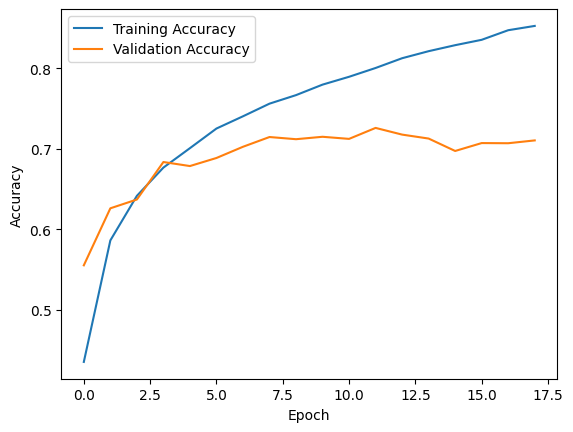

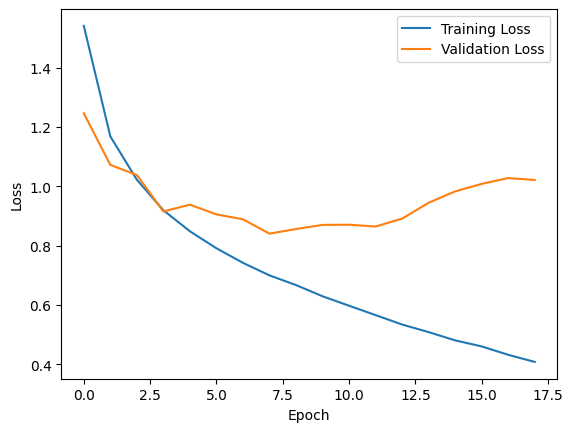

In [17]:
# Plot training/validation accuracy and loss curves
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 2s 5ms/step
Precision and Recall:
               precision    recall  f1-score   support

    airplane       0.79      0.71      0.75      1000
  automobile       0.87      0.80      0.83      1000
        bird       0.57      0.64      0.60      1000
         cat       0.62      0.41      0.49      1000
        deer       0.63      0.69      0.66      1000
         dog       0.59      0.68      0.63      1000
        frog       0.82      0.73      0.78      1000
       horse       0.73      0.79      0.76      1000
        ship       0.82      0.84      0.83      1000
       truck       0.76      0.85      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

Confusion Matrix:
 [[707  22  80  10  31   8   2  13  79  48]
 [ 21 803   9   3   3   2  14   5  29 111]
 [ 45   5 643  30  94  83  37  38  13  12]
 [ 20   7  99 4

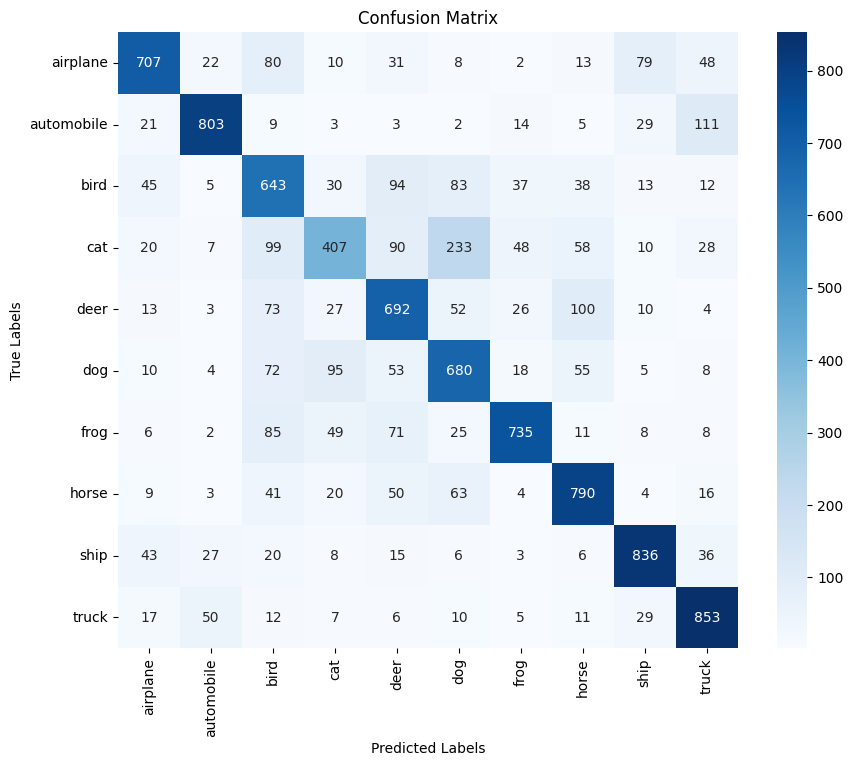

In [18]:
import seaborn as sns

# Calculate precision, recall, and confusion matrix
test_predictions = np.argmax(model1.predict(test_images), axis=1)
precision_recall = classification_report(test_labels, test_predictions, target_names=[str(class_names(i)) for i in range(10)])
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Precision and Recall:\n", precision_recall)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix with labels using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(class_names(i)) for i in range(10)], yticklabels=[str(class_names(i)) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Train the model
history2 = model2.fit(train_images, train_labels, epochs=200,validation_data=(test_images, test_labels),callbacks = [earlyStop])


Epoch 1/200


c:\Users\natha.NSLEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 183s 116ms/step - loss: 1.7089 - accuracy: 0.3652 - val_loss: 1.4423 - val_accuracy: 0.4652
Epoch 2/200
1563/1563 [==============================] - 182s 116ms/step - loss: 1.3855 - accuracy: 0.4986 - val_loss: 1.2623 - val_accuracy: 0.5455
Epoch 3/200
1563/1563 [==============================] - 181s 116ms/step - loss: 1.2437 - accuracy: 0.5554 - val_loss: 1.1166 - val_accuracy: 0.5994
Epoch 4/200
1563/1563 [==============================] - 179s 114ms/step - loss: 1.1487 - accuracy: 0.5905 - val_loss: 1.0482 - val_accuracy: 0.6348
Epoch 5/200
1563/1563 [==============================] - 178s 114ms/step - loss: 1.0812 - accuracy: 0.6160 - val_loss: 1.0640 - val_accuracy: 0.6263
Epoch 6/200
1563/1563 [==============================] - 179s 114ms/step - loss: 1.0233 - accuracy: 0.6391 - val_loss: 0.9472 - val_accuracy: 0.6673
Epoch 7/200
1563/1563 [==============================] - 179s 114ms/step - loss: 0.9850 - accuracy: 0.6531 - val_loss:

In [17]:
# Evaluate the model
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc2}')

313/313 [==============================] - 6s 19ms/step - loss: 0.7332 - accuracy: 0.7607
Test accuracy: 0.760699987411499


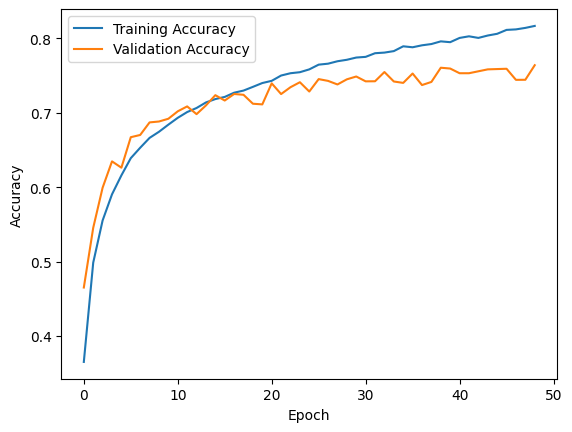

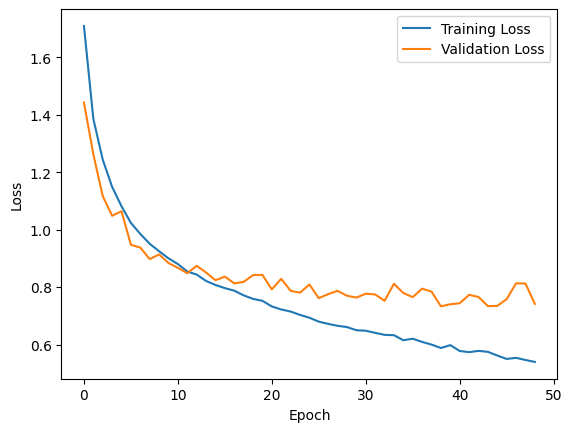

In [18]:
# Plot training/validation accuracy and loss curves
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 6s 19ms/step
Precision and Recall:
               precision    recall  f1-score   support

    airplane       0.78      0.76      0.77      1000
  automobile       0.93      0.78      0.85      1000
        bird       0.75      0.62      0.68      1000
         cat       0.59      0.62      0.60      1000
        deer       0.79      0.68      0.73      1000
         dog       0.69      0.69      0.69      1000
        frog       0.81      0.83      0.82      1000
       horse       0.75      0.84      0.79      1000
        ship       0.81      0.87      0.84      1000
       truck       0.75      0.90      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix:
 [[760   9  22  17  21   4  13  14  89  51]
 [ 21 784   4   6   4   4   9   2  27 139]
 [ 65   6 618  57  54  76  56  46  12  10]
 [ 19   5  43 

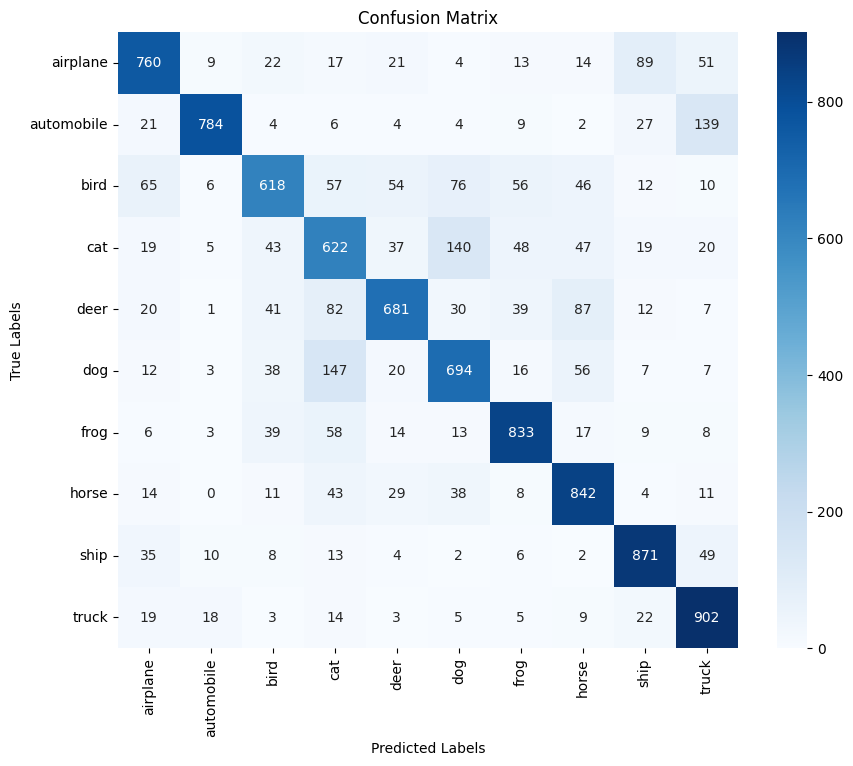

In [19]:
import seaborn as sns

# Calculate precision, recall, and confusion matrix
test_predictions = np.argmax(model2.predict(test_images), axis=1)
precision_recall = classification_report(test_labels, test_predictions, target_names=[str(class_names(i)) for i in range(10)])
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Precision and Recall:\n", precision_recall)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix with labels using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(class_names(i)) for i in range(10)], yticklabels=[str(class_names(i)) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
